## CE9010: Introduction to Data Analysis
## Semester 2 2018/19
## Xavier Bresson
<hr>

## Tutorial 3: Linear supervised regression
## Objectives
### $\bullet$ Code a linear regression model 
### $\bullet$ Implement gradient descent 
### $\bullet$ Explore results
<hr>

In [1]:
# Import libraries

# math library
import numpy as np

# visualization library
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x','pdf')
import matplotlib.pyplot as plt

# machine learning library
from sklearn.linear_model import LinearRegression

# 3d visualization
from mpl_toolkits.mplot3d import axes3d

# computational time
import time


## 1. Load dataset
<hr>
The data feature, $x$, is unique and represents the population size of various cities. <br>
The data label/target, $y$, to predict is the profit.

What is the number $n$ of training data?<br>
Hint: You may use numpy function `shape`.

In [2]:
# import data with numpy
data = np.loadtxt('data/profit_population.txt', delimiter=',')

# number of training data
n = data.shape[0] #YOUR CODE HERE
print('Number of training data=',n)

# print
print(data[:10,:])
print(data.shape)
print(data.dtype)

Number of training data= 97
[[ 6.1101 17.592 ]
 [ 5.5277  9.1302]
 [ 8.5186 13.662 ]
 [ 7.0032 11.854 ]
 [ 5.8598  6.8233]
 [ 8.3829 11.886 ]
 [ 7.4764  4.3483]
 [ 8.5781 12.    ]
 [ 6.4862  6.5987]
 [ 5.0546  3.8166]]
(97, 2)
float64


## 2. Explore the dataset distribution
<hr>

Plot the training data points.<br>
Hint: You may use matplotlib function `scatter(x,y)`.

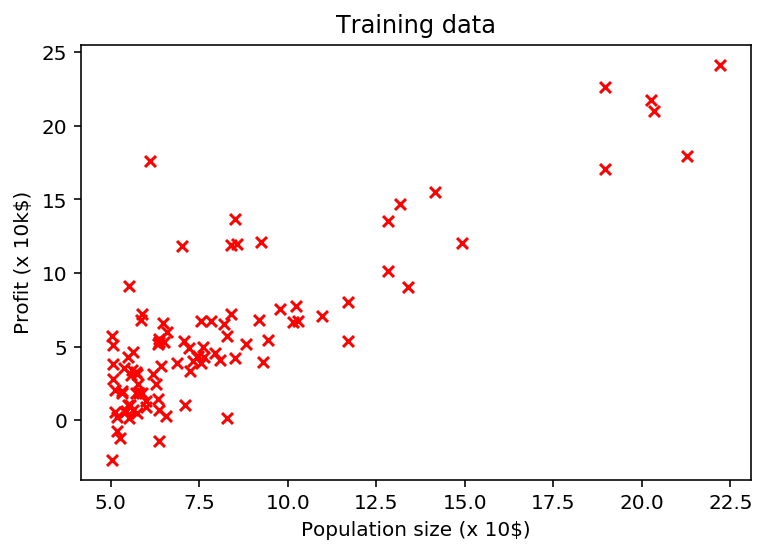

In [3]:
x_train = data[:,0]
y_train = data[:,1]

plt.figure(1)
plt.scatter(x_train, y_train, s=30, c='r', marker='x', linewidths=1) #YOUR CODE HERE
plt.title('Training data')
plt.xlabel('Population size (x 10$)')
plt.ylabel('Profit (x 10k$)')
plt.show()

## 3. Define the linear prediction function 
<hr>
$$
f_w(x) = w_0 + w_1 x
$$

There are 2 possible implementations:

1. Unvectorized implementation (with *for* loops): 
$$
f_w(x_i) = w_0 + w_1 x_i
$$
<br>

1. Vectorized implementation:
$$
f_w(x) = X w 
$$
with 
<br>
$$
X = 
\left[ 
\begin{array}{cccc}
1 & x_1 \\ 
1 & x_2 \\ 
\vdots\\
1 & x_n
\end{array} 
\right]
\quad
\textrm{ and }
\quad
w = 
\left[ 
\begin{array}{cccc}
w_0 \\ 
w_1 
\end{array} 
\right]
\quad
\Rightarrow 
\quad
f_w(x) = X w  =
\left[ 
\begin{array}{cccc}
w_0 + w_1 x_1 \\ 
w_0 + w_1 x_2 \\ 
\vdots\\
w_0 + w_1 x_n
\end{array} 
\right]
$$

Implement the vectorized version of the linear predictive function. <br>

Check your code correctness: The first 5 values of $f_w(x)$ are [-8.35,-7.53,-11.72,-9.60, -8.00] with $w_0=0.2, w_1=-1.4$. <br>

Hint: Respect the sizes of $X$ and $w$ when carrying out linear algebra multiplications. You may use numpy function `dot` for matrix multiplication.


In [4]:
# construct data matrix
X = np.ones([n,2]) 
X[:,1] = x_train
print(X.shape)
print(X[:5,:])


# parameters vector
w = np.array([0.2,-1.4])[:,None] # [:,None] adds a singleton dimension
print(w.shape)
#print(w)


# predictive function definition
def f_pred(X,w): 
    f = X.dot(w) #YOUR CODE HERE
    return f 


# Test predicitive function 
y_pred = f_pred(X,w)
print(y_pred[:5])

(97, 2)
[[1.     6.1101]
 [1.     5.5277]
 [1.     8.5186]
 [1.     7.0032]
 [1.     5.8598]]
(2, 1)
[[ -8.35414]
 [ -7.53878]
 [-11.72604]
 [ -9.60448]
 [ -8.00372]]


## 4. Define the linear regression loss 
<hr>
$$
L(w)=\frac{1}{n} \sum_{i=1}^n \ \Big( f_w(x_i) – y_i \Big)^2
$$

There are again 2 possible implementations:
1. Unvectorized implementation. 

1. Vectorized implementation:
$$
L(w)=\frac{1}{n} (Xw-y)^T(Xw-y)
$$
with 
<br>
$$
Xw=
\left[ 
\begin{array}{cccc}
w_0 + w_1 x_1 \\ 
w_0 + w_1 x_2 \\ 
\vdots\\
w_0 + w_1 x_n
\end{array} 
\right]
\quad
\textrm{ and }
\quad
y = 
\left[ 
\begin{array}{cccc}
y_1 \\ 
y_2 \\ 
\vdots\\
y_n
\end{array} 
\right]
$$

Implement the vectorized version of the linear regression loss function. <br>

Check your code correctness: The loss values is $399.75$ for $w_0=0.2, w_1=-1.4$. <br>

Hint: Respect the sizes of $X$, $w$ and $y$ when carrying out linear algebra multiplications. You may use numpy function transpose `.T`.


In [5]:
# loss function definition
def loss_mse(y_pred,y): 
    n = len(y)
    loss = 1/n* (y_pred - y).T.dot(y_pred - y) #YOUR CODE HERE
    return loss


# Test loss function 
y = y_train[:,None] # label 
#print(y.shape)
y_pred = f_pred(X,w) # prediction
loss = loss_mse(y_pred,y)
print(loss)

[[399.75283295]]


## 5. Define the gradient of the linear regression loss 
<hr>

$\bullet$ Unvectorized implementation:
\begin{eqnarray}
\frac{\partial}{\partial w_0} L(w)&=&\frac{2}{n} \sum_{i=1}^n \ ( w_0+w_1x_i - y_i )\\
\frac{\partial}{\partial w_1} L(w)&=&\frac{2}{n} \sum_{i=1}^n \ ( w_0+w_1x_i - y_i )x_i
\end{eqnarray}





$\bullet$ Vectorized implementation: Given the loss
$$
L(w)=\frac{1}{n} (Xw-y)^T(Xw-y)
$$
The gradient is given by  
$$
\frac{\partial}{\partial w} L(w) = \frac{2}{n} X^T(Xw-y)
$$


Implement the vectorized version of the gradient of the linear regression loss function. <br>

Check your code correctness: The gradient value is [-34.12,-355.32] for $w_0=0.2, w_1=-1.4$. <br>

Hint: Respect the sizes of $X$, $w$ and $y$ when carrying out linear algebra multiplications. 


In [6]:
# gradient function definition
def grad_loss(y_pred,y,X):
    n = len(y)
    grad = 2/n* X.T.dot(y_pred-y) #YOUR CODE HERE
    return grad


# Test grad function 
y_pred = f_pred(X,w)
grad = grad_loss(y_pred,y,X)
print(grad)    

[[ -34.1257101 ]
 [-355.32481939]]


## 6. Implement the gradient descent algorithm 
<hr>

$\bullet$ Unvectorized implementation:
\begin{eqnarray}
w_0^{k+1} &= w_0^{k}& - \tau \frac{2}{n} \sum_{i=1}^n \ ( w_0^{k}+w_1^{k}x_i - y_i ) \\
w_1^{k+1} &= w_1^{k}& - \tau \frac{2}{n} \sum_{i=1}^n \ ( w_0^{k}+w_1^{k}x_i - y_i ) x_i
\end{eqnarray}


$\bullet$ Vectorized implementation: 
$$
w^{k+1} = w^{k} - \tau  \frac{2}{n} X^T(Xw^{k}-y)
$$

**6.1** Implement the vectorized version of the gradient descent function. <br>
Check your code correctness: The $w^{k}$ value after $20$ iterations is [0.116,0.789] for initial values $w_0^{k=0}=0.2, w_1^{k=0}=-1.4$ and the loss $L$ is 11.90.<br>


**6.2** Plot the loss values $L(w^k)$ w.r.t. iteration $k$ the number of iterations.<br>

Hint: You may use a table to store the values of $L(w^k)$ at each iteration.


Time= 0.0017940998077392578
11.90628849744614
[[0.11639669]
 [0.78963356]]


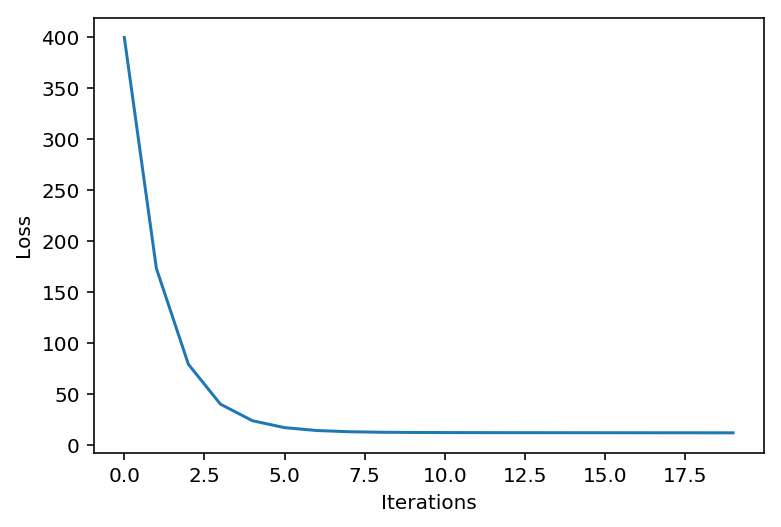

In [7]:
# gradient descent function definition
def grad_desc(X, y , w_init=np.array([0,0])[:,None] ,tau=0.01, max_iter=500):

    L_iters = np.zeros([max_iter]) # record the loss values
    w_iters = np.zeros([max_iter,2]) # record the loss values
    w = w_init # initialization
    for i in range(max_iter): # loop over the iterations
        y_pred = f_pred(X,w) # linear predicition function #YOUR CODE HERE
        grad_f = grad_loss(y_pred,y,X) # gradient of the loss #YOUR CODE HERE
        w = w - tau* grad_f # update rule of gradient descent #YOUR CODE HERE
        L_iters[i] = loss_mse(y_pred,y) # save the current loss value 
        w_iters[i,:] = w[0],w[1] # save the current w value 
        
    return w, L_iters, w_iters


# run gradient descent algorithm 
start = time.time()
w_init = np.array([0.2,-1.4])[:,None]
tau = 0.01
max_iter = 20
w, L_iters, w_iters = grad_desc(X,y,w_init,tau,max_iter)
print('Time=',time.time() - start)
print(L_iters[-1])
print(w)


# plot
plt.figure(2)
plt.plot(np.array(range(max_iter)), L_iters)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()


## 7. Plot the linear prediction function
<hr>
$$
f_w(x) = w_0 + w_1 x
$$

Hint: You may use numpy function `linspace`.


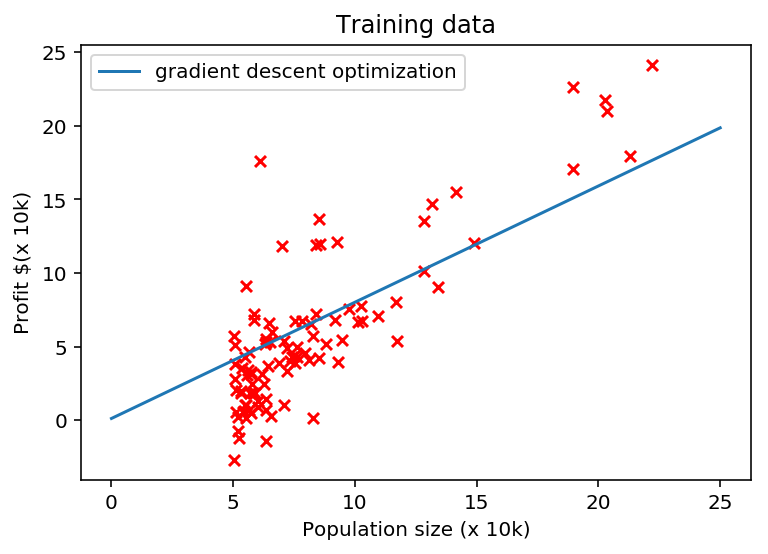

In [8]:
# linear regression model
x_pred = np.linspace(0,25,100) #YOUR CODE HERE
y_pred = w[0] + w[1]* x_pred #YOUR CODE HERE

# plot
plt.figure(3)
plt.scatter(x_train, y_train, s=30, c='r', marker='x', linewidths=1)
plt.plot(x_pred, y_pred,label='gradient descent optimization'.format(i=1))
plt.legend(loc='best')
plt.title('Training data')
plt.xlabel('Population size (x 10k)')
plt.ylabel('Profit $(x 10k)')
plt.show()

## 8. Comparison with Scikit-learn linear regression algorithm
<hr>
**8.1** What is the loss value of the Scikit-learn solution? <br>
Compare with the loss value given by gradient descent?<br>
What do we need to do to get a better loss (and solution) with gradient descent? 

Time= 0.0070018768310546875
[[-3.89578088]
 [ 1.19303364]]
loss sklearn= [[8.95394275]]
loss gradient descent= 11.90628849744614


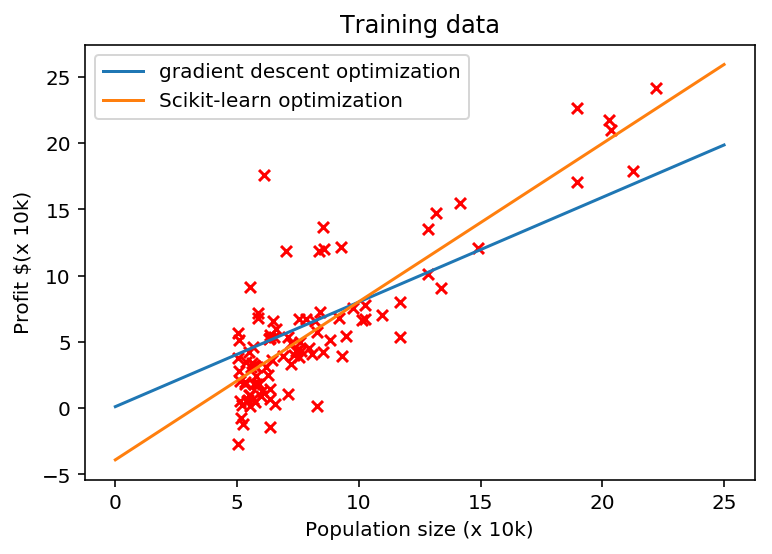

In [9]:
# run linear regression with scikit-learn
start = time.time()
lin_reg_sklearn = LinearRegression()
lin_reg_sklearn.fit(x_train[:,None], y_train) # learn the model parameters #YOUR CODE HERE
print('Time=',time.time() - start)


# compute loss value
w_sklearn = np.zeros([2,1])
w_sklearn[0,0] = lin_reg_sklearn.intercept_
w_sklearn[1,0] = lin_reg_sklearn.coef_
print(w_sklearn)
loss_sklearn = loss_mse(f_pred(X,w_sklearn),y_train[:,None])
print('loss sklearn=',loss_sklearn)
print('loss gradient descent=',L_iters[-1]) 


# plot
y_pred_sklearn = w_sklearn[0] + w_sklearn[1]* x_pred
plt.figure(3)
plt.scatter(x_train, y_train, s=30, c='r', marker='x', linewidths=1)
plt.plot(x_pred, y_pred,label='gradient descent optimization'.format(i=1))
plt.plot(x_pred, y_pred_sklearn,label='Scikit-learn optimization'.format(i=2))
plt.legend(loc='best')
plt.title('Training data')
plt.xlabel('Population size (x 10k)')
plt.ylabel('Profit $(x 10k)')
plt.show()


**8.2** What do we need to do to get a better loss (and solution) with gradient descent?<br>
We need more gradient descent iterations.<br>
Run gradient descent with 1,000 iterations. Check the loss value.<br>

Time= 0.015263080596923828
8.95643056529655
[[-3.7793118 ]
 [ 1.18133306]]


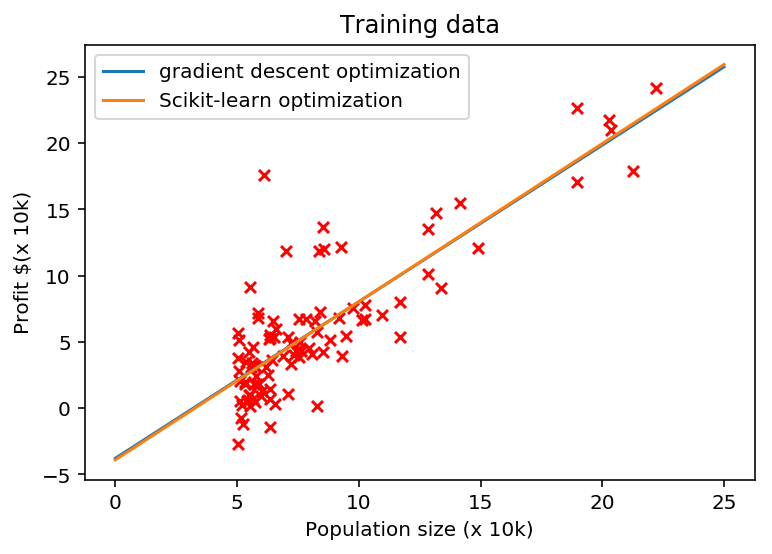

In [10]:
# run gradient descent algorithm 
start = time.time()
w_init = np.array([0.2,-1.4])[:,None]
tau = 0.01
max_iter = 1000
w, L_iters, w_iters = grad_desc(X,y,w_init,tau,max_iter)
print('Time=',time.time() - start)
print(L_iters[-1])
print(w)


# plot
y_pred = w[0] + w[1]* x_pred
plt.figure(4)
plt.scatter(x_train, y_train, s=30, c='r', marker='x', linewidths=1)
plt.plot(x_pred, y_pred,label='gradient descent optimization'.format(i=1))
plt.plot(x_pred, y_pred_sklearn,label='Scikit-learn optimization'.format(i=2))
plt.legend(loc='best')
plt.title('Training data')
plt.xlabel('Population size (x 10k)')
plt.ylabel('Profit $(x 10k)')
plt.show()

## 9. Predict profit for a city with population of 45,000?
<hr>

In [11]:
# Predict profit for a city with population of 45000
print('Profit would be',w.T.dot([1,4.5])[0]*10000) #YOUR CODE HERE

Profit would be 15366.869767693142


## 10. [Bonus] Plot the loss surface, the contours of the loss and the gradient descent steps
<hr>

Hint: Use function *plot_gradient_descent(X,y,w_init,tau,max_iter)*.


In [12]:
# plot gradient descent 
def plot_gradient_descent(X,y,w_init,tau,max_iter):
    
    def f_pred(X,w):
        f = X.dot(w) 
        return f
    
    def loss_mse(y_pred,y):
        n = len(y)
        loss = 1/n* (y_pred - y).T.dot(y_pred - y)
        return loss
    
    def grad_desc(X, y , w_init=np.array([0,0])[:,None] ,tau=0.01, max_iter=500):

        L_iters = np.zeros([max_iter]) # record the loss values
        w_iters = np.zeros([max_iter,2]) # record the loss values
        w = w_init # initialization
        for i in range(max_iter): # loop over the iterations
            y_pred = f_pred(X,w) # linear predicition function
            grad_f = grad_loss(y_pred,y,X) # gradient of the loss
            w = w - tau* grad_f # update rule of gradient descent
            L_iters[i] = loss_mse(y_pred,y) # save the current loss value
            w_iters[i,:] = w[0],w[1] # save the current w value

        return w, L_iters, w_iters

    # run gradient descent
    w, L_iters, w_iters = grad_desc(X,y,w_init,tau,max_iter)
    
    # Create grid coordinates for plotting a range of L(w0,w1)-values
    B0 = np.linspace(-10, 10, 50)
    B1 = np.linspace(-1, 4, 50)
    xx, yy = np.meshgrid(B0, B1, indexing='xy')
    Z = np.zeros((B0.size,B1.size))  

    # Calculate loss values based on L(w0,w1)-values
    for (i,j),v in np.ndenumerate(Z):
        Z[i,j] = loss_mse(f_pred(X,w=[[xx[i,j]],[yy[i,j]]]),y)

    # 3D visualization
    fig = plt.figure(figsize=(15,6))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122, projection='3d')

    # Left plot
    CS = ax1.contour(xx, yy, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
    ax1.scatter(w[0],w[1], c='r')
    ax1.plot(w_iters[:,0],w_iters[:,1])

    # Right plot
    ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
    ax2.set_zlabel('Loss $L(w_0,w_1)$')
    ax2.set_zlim(Z.min(),Z.max())
    #ax2.view_init(elev=10, azim=-120)

    # plot gradient descent
    Z2 = np.zeros([max_iter])
    for i in range(max_iter):
        w0 = w_iters[i,0]
        w1 = w_iters[i,1]
        Z2[i] = loss_mse(f_pred(X,w=[[w0],[w1]]),y)
    ax2.plot(w_iters[:,0],w_iters[:,1],Z2)
    ax2.scatter(w[0],w[1],loss_mse(f_pred(X,w=[w[0],w[1]]),y), c='r')

    # settings common to both plots
    for ax in fig.axes:
        ax.set_xlabel(r'$w_0$', fontsize=17)
        ax.set_ylabel(r'$w_1$', fontsize=17)
    

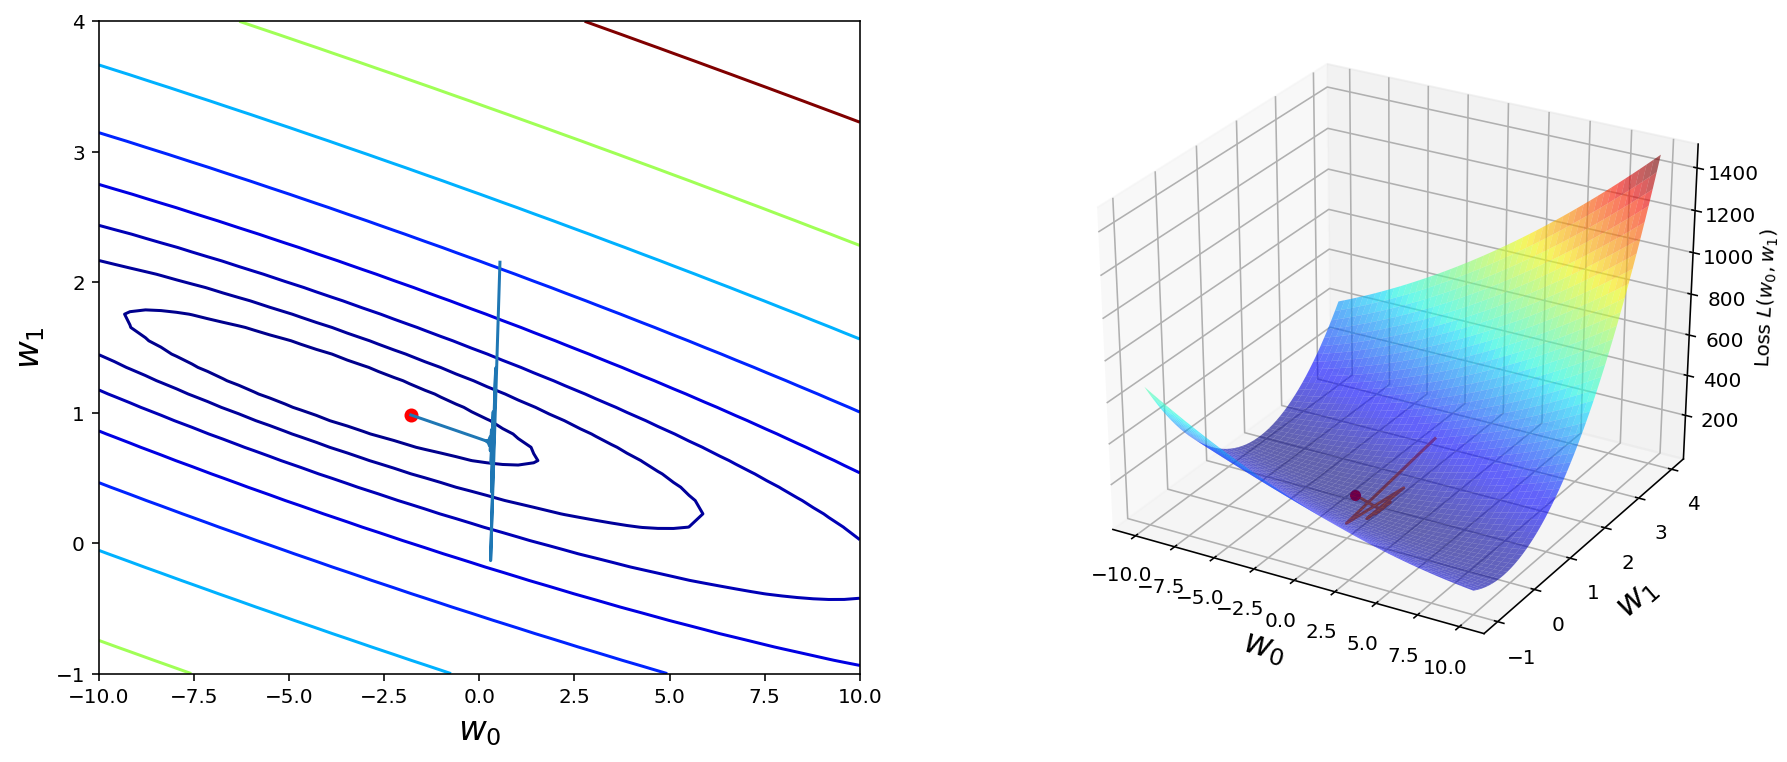

In [13]:
# run plot_gradient_descent function
w_init = np.array([0.2,-1.4])[:,None]
tau = 0.01
max_iter = 200
plot_gradient_descent(X,y,w_init,tau,max_iter) 


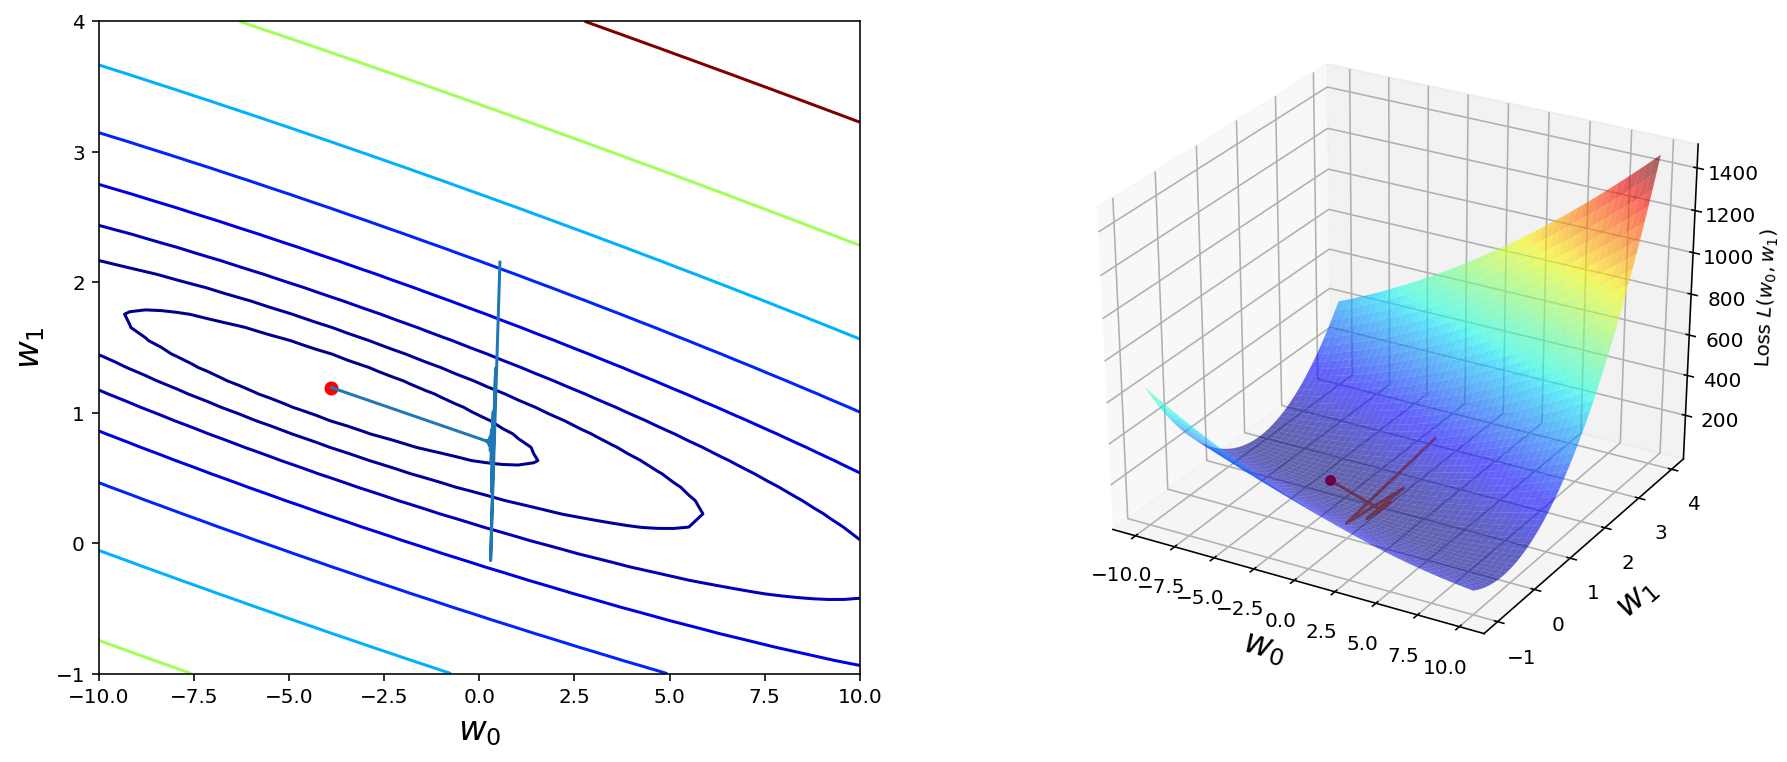

In [14]:
# run plot_gradient_descent function
w_init = np.array([0.2,-1.4])[:,None]
tau = 0.01
max_iter = 2000
plot_gradient_descent(X,y,w_init,tau,max_iter) 
